In [2]:
import tensorflow as tf
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
def autoencoder(dimensions=[784, 512, 256, 64]):
    
    x = tf.placeholder(tf.float32, [None, dimensions[0]], name='x')
    inp = x
    
    
    
    encoder = []
    
    
    
    
    
    for layer_i, n_output in enumerate(dimensions[1:]):
        n_input= dimensions[layer_i ]
        W = tf.Variable(tf.truncated_normal([n_input,n_output], stddev=0.1))
        b = tf.Variable(tf.zeros([n_output]))
        encoder.append(W)
        output = tf.nn.tanh(tf.matmul(inp, W) + b)
        inp = output

    # %% latent representation
    z = inp
    encoder.reverse()


    # %% Build the decoder using the same weights
    for layer_i, n_output in enumerate(dimensions[:-1][::-1]):
        W = tf.transpose(encoder[layer_i])
        b = tf.Variable(tf.zeros([n_output]))
        output = tf.nn.tanh(tf.matmul(inp, W) + b)
        inp = output

    # %% now have the reconstruction through the network
    y = inp

    # %% cost function measures pixel-wise difference
    cost = tf.reduce_sum(tf.square(y - x))
    return {'x': x, 'z': z, 'y': y, 'cost': cost}

In [4]:
from keras.datasets import cifar10


(x_train, y_train), (x_test, y_test) = cifar10.load_data()
n_examples = 40000
    

In [5]:
x_train=x_train[:1000]
x_train.shape
x_train=x_train.reshape(-1,3072)
print x_train.shape


y_train=y_train[:1000]
print y_train.shape

mean_img = np.mean(x_train, axis=0)

(1000, 3072)
(1000, 1)


In [6]:
mean_img.shape

(3072,)

In [9]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
mean_img = np.mean(mnist.train.images, axis=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
ae=autoencoder()

    # %%
learning_rate = 0.01
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(ae['cost'])

    # %%
    # We create a session to use the graph
sess = tf.Session()
sess.run(tf.global_variables_initializer())

    # %%
    # Fit all training data
batch_size = 100
n_epochs = 10
for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples // batch_size):
        batch_xs, _ = mnist.train.next_batch(batch_size)
        train = np.array([img - mean_img for img in batch_xs])
        sess.run(optimizer, feed_dict={ae['x']: train})
    print(epoch_i, sess.run(ae['cost'], feed_dict={ae['x']: train}))

    # %%
    # Plot example reconstructions


(0, 960.71436)
(1, 987.54675)
(2, 1005.2076)
(3, 1023.9537)
(4, 1097.3859)
(5, 1038.4944)
(6, 1069.8582)
(7, 1089.6299)
(8, 1079.1663)
(9, 1052.8561)


(10, 784)
(10, 784)
(2, 10)


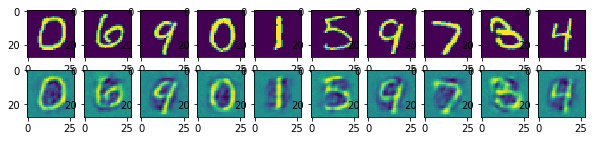

In [13]:
n_examples = 10
test_xs, _ = mnist.test.next_batch(n_examples)
print test_xs.shape
test_xs_norm = np.array([img - mean_img for img in test_xs])
recon = sess.run(ae['y'], feed_dict={ae['x']: test_xs_norm})
print(recon.shape)
fig, axs = plt.subplots(2, n_examples, figsize=(10, 2))
print axs.shape

for example_i in range(n_examples):
    axs[0][example_i].imshow(
        np.reshape(test_xs[example_i, :], (28, 28)))
    #img=np.reshape(recon[example_i, ...], (784,))
    #img += mean_img
    axs[1][example_i].imshow(np.reshape(recon[example_i, ...],(28, 28)))
fig.show()
plt.draw()
plt.show()